# Using the Wisconsin breast cancer diagnostic data set for predictive analysis





#Load Libraries

In [117]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# keeps the plots in one place. calls image as static pngs
%matplotlib inline 
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import mpld3 as mpl

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold


from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

# Load the data

In [118]:
df = pd.read_csv(r'C:\Users\user\Desktop\Golden Task 2\breastcancer.csv',header = 0)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Clean and prepare data

In [119]:
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)
# size of the dataframe
len(df)

569

In [120]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [121]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Explore data

In [122]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


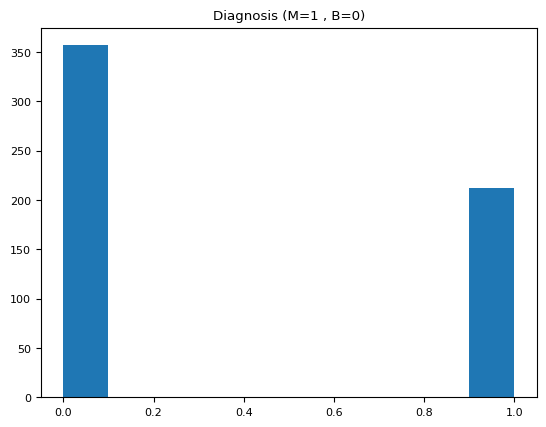

In [123]:
df.describe()
plt.hist(df['diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')
plt.show()

### nucleus features vs diagnosis

In [124]:
features_mean=list(df.columns[1:11])
# split dataframe into two based on diagnosis
dfM=df[df['diagnosis'] ==1]
dfB=df[df['diagnosis'] ==0]

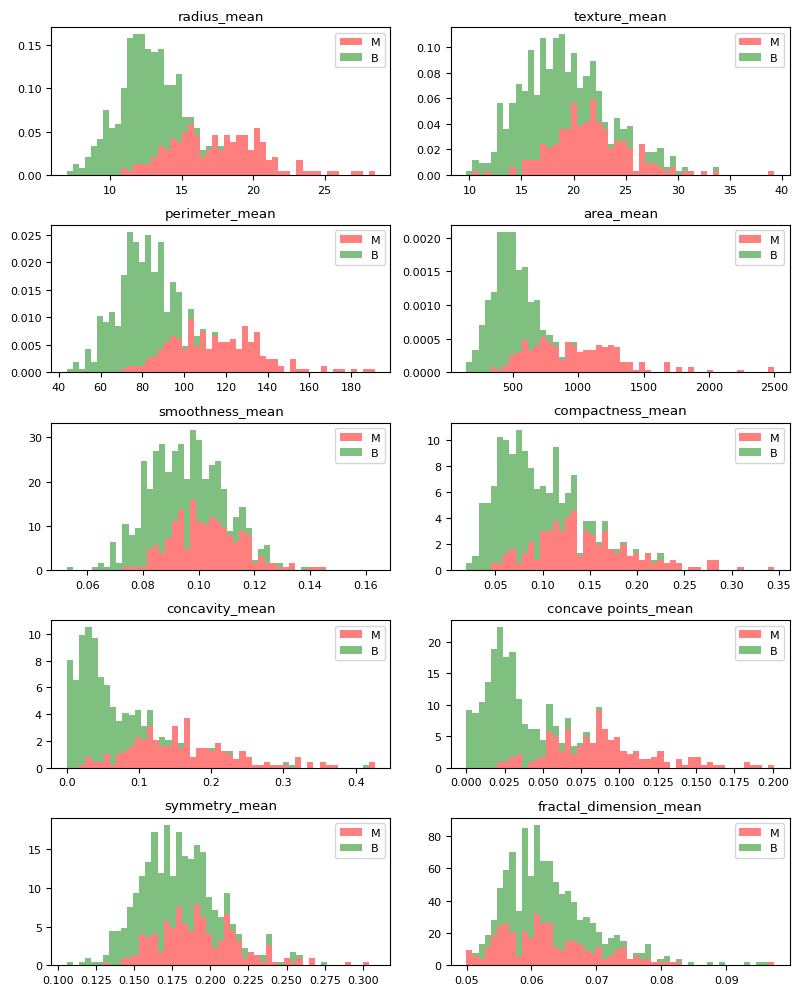

In [125]:
#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8, 10))
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.figure
    binwidth = (max(df[features_mean[idx]]) - min(df[features_mean[idx]])) / 50
    ax.hist([dfM[features_mean[idx]], dfB[features_mean[idx]]], bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth), alpha=0.5, stacked=True, density=True, label=['M', 'B'], color=['r', 'g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()


###Observations

1. mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors. 
2. mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other. In any of the histograms there are no noticeable large outliers that warrants further cleanup.

## Creating a test set and a training set
Since this data set is not ordered, I am going to do a simple 70:30 split to create a training data set and a test data set.

In [126]:
traindf, testdf = train_test_split(df, test_size = 0.3)

## Model Classification

Here we are going to build a classification model and evaluate its performance using the training set.



In [127]:


def classification_model(model, data, predictors, outcome, kf):
    # Fit the model:
    model.fit(data[predictors], data[outcome])

    # Make predictions on the training set:
    predictions = model.predict(data[predictors])

    # Print accuracy
    accuracy = metrics.accuracy_score(predictions, data[outcome])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))

    # Perform k-fold cross-validation
    error = []
    for train, test in kf.split(data):
        # Filter training data
        train_predictors = data[predictors].iloc[train, :]

        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]

        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)

        # Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test, :], data[outcome].iloc[test]))

    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

    # Fit the model again so that it can be referred to outside the function:
    model.fit(data[predictors], data[outcome])




### Logistic Regression model

Logistic regression is widely used for classification of discrete data. In this case we will use it for binary (1,0) classification.

Based on the observations in the histogram plots, we can reasonably hypothesize that the cancer diagnosis depends on the mean cell radius, mean perimeter, mean area, mean compactness, mean concavity and mean concave points. We can then  perform a logistic regression analysis using those features as follows:

In [128]:
predictor_var = ['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concave points_mean']
outcome_var = 'diagnosis'
model = LogisticRegression()

# Initialize KFold with n_splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Assuming you have a function classification_model defined elsewhere
# that uses KFold for cross-validation, you can now use it here.
classification_model(model, traindf, predictor_var, outcome_var, kf)

Accuracy : 88.693%
Cross-Validation Score : 88.956%


The prediction accuracy is reasonable. 
What happens if we use just one predictor? 
Use the mean_radius:

In [129]:
predictor_var = ['radius_mean']
model=LogisticRegression()
classification_model(model,traindf,predictor_var,outcome_var,kf)

Accuracy : 89.196%
Cross-Validation Score : 88.687%


This gives a similar prediction accuracy and a cross-validation score.


The accuracy of the predictions are good but not great. The cross-validation scores are reasonable. 
Can we do better with another model?

### Decision Tree Model

In [130]:
predictor_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']
model = DecisionTreeClassifier()
classification_model(model,traindf,predictor_var,outcome_var,kf)

Accuracy : 100.000%
Cross-Validation Score : 90.949%


Here we are over-fitting the model probably due to the large number of predictors.
Let use a single predictor, the obvious one is the radius of the cell.

In [131]:
predictor_var = ['radius_mean']
model = DecisionTreeClassifier()
classification_model(model,traindf,predictor_var,outcome_var,kf)

Accuracy : 96.985%
Cross-Validation Score : 84.943%


Using a single predictor gives a 97% prediction accuracy for this model but the cross-validation score is not that great. 

### Randome Forest

In [132]:
# Use all the features of the nucleus
predictor_var = features_mean
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
classification_model(model, traindf,predictor_var,outcome_var,kf)

Accuracy : 95.226%
Cross-Validation Score : 91.962%


Using all the features improves the prediction accuracy and the cross-validation score is great.

 An advantage with Random Forest is that it returns a feature importance matrix which can be used to select features. So lets select the top 5 features and use them as predictors.

In [133]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featimp)

concave points_mean       0.240477
perimeter_mean            0.194778
concavity_mean            0.162706
area_mean                 0.160126
radius_mean               0.108878
compactness_mean          0.052307
texture_mean              0.046119
fractal_dimension_mean    0.014360
smoothness_mean           0.010917
symmetry_mean             0.009330
dtype: float64


In [134]:
# Using top 5 features
predictor_var = ['concave points_mean','area_mean','radius_mean','perimeter_mean','concavity_mean',]
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=2)
classification_model(model,traindf,predictor_var,outcome_var,kf)

Accuracy : 94.221%
Cross-Validation Score : 92.212%


Using the top 5 features only changes the prediction accuracy a bit but I think we get a better result if we use all the predictors.

What happens if we use a single predictor as before? Just check.

In [135]:
predictor_var =  ['radius_mean']
model = RandomForestClassifier(n_estimators=100)
classification_model(model, traindf,predictor_var,outcome_var,kf)

Accuracy : 96.985%
Cross-Validation Score : 85.193%


This gives a better prediction accuracy too but the cross-validation is not great.


## Using on the test data set

In [136]:
# Use all the features of the nucleus
predictor_var = features_mean
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
classification_model(model, testdf,predictor_var,outcome_var,kf)

Accuracy : 97.076%
Cross-Validation Score : 92.403%


The prediction accuracy for the test data set using the above Random Forest model is 97%!